In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [4]:
df1 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/공모전 데이터 모음/강서구 생활인구(2020 1분기~2021 3분기 동정보포함).xlsx')
df2 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/공모전 데이터 모음/강서구 상주인구(2020 1분기~2021 3분기 동정보 포함).xlsx')

In [5]:
df1

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,동 정보,Unnamed: 8
0,2020.0,4.0,A,골목상권,1000552.0,가로공원로76가길,632563.0,화곡1동,NaN
1,2020.0,3.0,A,골목상권,1000552.0,가로공원로76가길,703492.0,화곡1동,NaN
2,2021.0,3.0,A,골목상권,1000552.0,가로공원로76가길,525757.0,화곡1동,NaN
3,2020.0,2.0,A,골목상권,1000552.0,가로공원로76가길,714248.0,화곡1동,NaN
4,2021.0,2.0,A,골목상권,1000552.0,가로공원로76가길,502344.0,화곡1동,NaN
...,...,...,...,...,...,...,...,...,...
482,2021.0,1.0,R,전통시장,1001409.0,화곡중앙골목시장,224023.0,화곡1동,NaN
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,가양2동 없음
485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,가양3동 없음


In [6]:
df20_1=df1[df1["기준 년코드"]==2020] #2020년
df20_1=df20_1[df20_1["기준_분기_코드"]==1]
df20_1 #df20_1은 20년,1분기 것만.

df20_2=df1[df1["기준 년코드"]==2020] #2020년
df20_2=df20_2[df20_2["기준_분기_코드"]==2]

df20_3=df1[df1["기준 년코드"]==2020] #2020년
df20_3=df20_3[df20_3["기준_분기_코드"]==3]

df20_4=df1[df1["기준 년코드"]==2020] #2020년
df20_4=df20_4[df20_4["기준_분기_코드"]==4]
#-----------------21년---------------------
df21_1=df1[df1["기준 년코드"]==2021] #2021년
df21_1=df21_1[df21_1["기준_분기_코드"]==1]

df21_2=df1[df1["기준 년코드"]==2021] #2021년
df21_2=df21_2[df21_2["기준_분기_코드"]==2]

df21_3=df1[df1["기준 년코드"]==2021] #2021년
df21_3=df21_3[df21_3["기준_분기_코드"]==3]

In [7]:
def up(data,date):
    groups = data.groupby('동 정보')
    data2=groups.mean() #평균
    data2=data2.reset_index()
    data2=data2[['동 정보','총_생활인구_수']]
    data2.columns=['동 정보',date]
    return data2
df20_1=up(df20_1,'20년 1분기')
df20_2=up(df20_2,'20년 2분기')
df20_3=up(df20_3,'20년 3분기')
df20_4=up(df20_4,'20년 4분기')
df21_1=up(df21_1,'21년 1분기')
df21_2=up(df21_2,'21년 2분기')
df21_3=up(df21_3,'21년 3분기')

In [8]:
df_list=[df20_1,df20_2,df20_3,df20_4,df21_1,df21_2,df21_3]
df_all=pd.concat(df_list,axis=1)
subset=df20_1[['동 정보']]
df_all=df_all.drop(df_all.columns[[2,4,6]],axis=1)
#subset=df_all[['동 정보','201','202','203','204','211','212','213']]
#subset
df_all=subset.join(df_all,how='inner')
df_all.set_index('동 정보',inplace=True)
df_all=df_all.T
df_all.head()

동 정보,가양1동,공항동,등촌1동,등촌2동,등촌3동,발산1동,방화1동,방화2동,염창동,우장산동,화곡1동,화곡2동,화곡3동,화곡4동,화곡6동,화곡8동,화곡본동
20년 1분기,207509.0,637858.8,415315.75,672708.666667,118281.0,669376.000000,633721.0,674867.00,784763.25,737459.00,935033.4,688772.25,529510.75,592561.6,764774.666667,1072286.00,865307.75
20년 2분기,198537.0,677884.2,402466.25,664384.333333,144086.5,684766.000000,628683.6,624782.50,803551.75,753757.25,955239.3,654019.00,516323.25,665281.2,818534.000000,952512.00,848854.75
20년 3분기,201944.0,668417.0,402012.00,670436.000000,136688.5,689139.666667,631764.2,616222.00,787205.25,810669.75,998349.4,679055.50,529476.25,641706.4,857460.666667,957440.00,908554.75
20년 4분기,207138.0,638343.0,400687.50,647693.333333,133038.0,676242.333333,639439.8,621818.75,803180.25,813467.50,965587.4,706563.00,524384.75,593537.6,850589.333333,979050.75,896313.50
21년 1분기,209163.0,638010.6,443398.25,611333.333333,128329.5,675956.000000,643211.0,611584.00,840237.25,814319.25,992231.1,739460.50,531230.00,592293.2,853719.000000,1113679.00,878251.50


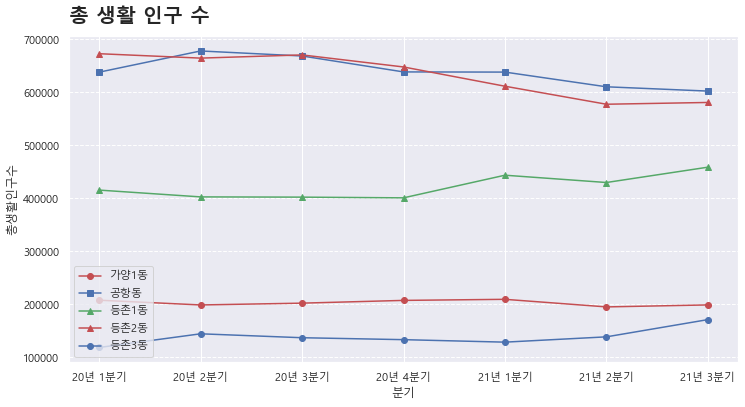

In [9]:
fig=plt.figure(figsize=(12,6))
index=df_all.index
a1,=plt.plot(index,df_all['가양1동'],'ro-')
a2,=plt.plot(index,df_all['공항동'],'bs-')
a3,=plt.plot(index,df_all['등촌1동'],'g^-')
a4,=plt.plot(index,df_all['등촌2동'],'r^-')
a5,=plt.plot(index,df_all['등촌3동'],'bo-')
plt.legend([a1,a2,a3,a4,a5],['가양1동','공항동','등촌1동','등촌2동','등촌3동'],loc=3)
plt.xlabel('분기')
plt.ylabel('총생활인구수')
plt.title("총 생활 인구 수",size=20,weight='bold',pad='13',loc='left')
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()